In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
# Cargar los datos climáticos históricos en un DataFrame de Pandas
# Por ejemplo, aquí se asume que los datos están en un archivo CSV llamado "datos_climaticos.csv"
data = pd.read_csv("data/temperature.csv", parse_dates=['datetime'])

In [12]:
data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


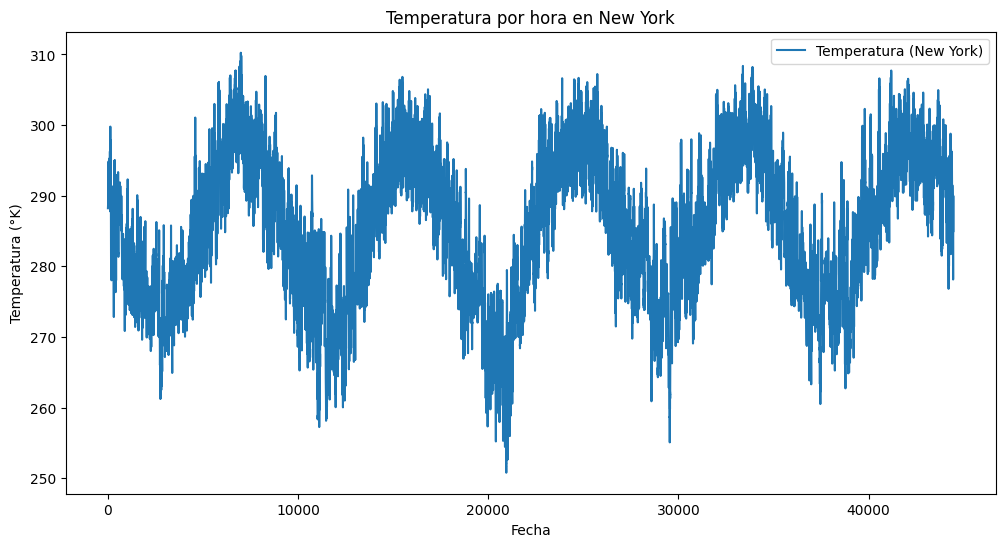

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data['New York'], label='Temperatura (New York)')
plt.title('Temperatura por hora en New York')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°K)')
plt.legend()
plt.show()

In [14]:
missing_values = data.isnull().sum()

In [15]:
missing_values

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [16]:
data = data.fillna(data.median())

In [17]:
vancouver_data = data[['datetime', 'Vancouver']].copy()

In [20]:
vancouver_data

,datetime,Vancouver
0,2012-10-01 12:00:00,283.450000
1,2012-10-01 13:00:00,284.630000
2,2012-10-01 14:00:00,284.629041
3,2012-10-01 15:00:00,284.626998
4,2012-10-01 16:00:00,284.624955
...,...,...
45248,2017-11-29 20:00:00,283.450000
45249,2017-11-29 21:00:00,283.450000
45250,2017-11-29 22:00:00,283.450000
45251,2017-11-29 23:00:00,283.450000


In [21]:
vancouver_data.columns = ['Fecha', 'Temperatura']

In [23]:
# Convertir la columna de fecha a formato datetime
vancouver_data['Fecha'] = pd.to_datetime(vancouver_data['Fecha'])

In [24]:
# Convertir la fecha a números enteros para utilizarla en el modelo
vancouver_data['Fecha'] = pd.to_numeric(vancouver_data['Fecha'])

In [25]:
# Separar las características (X) y la variable objetivo (y)
X = vancouver_data[['Fecha']]
y = vancouver_data['Temperatura']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Error cuadrático medio (MSE): 43.791228087002125


In [ ]:
# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [ ]:
# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

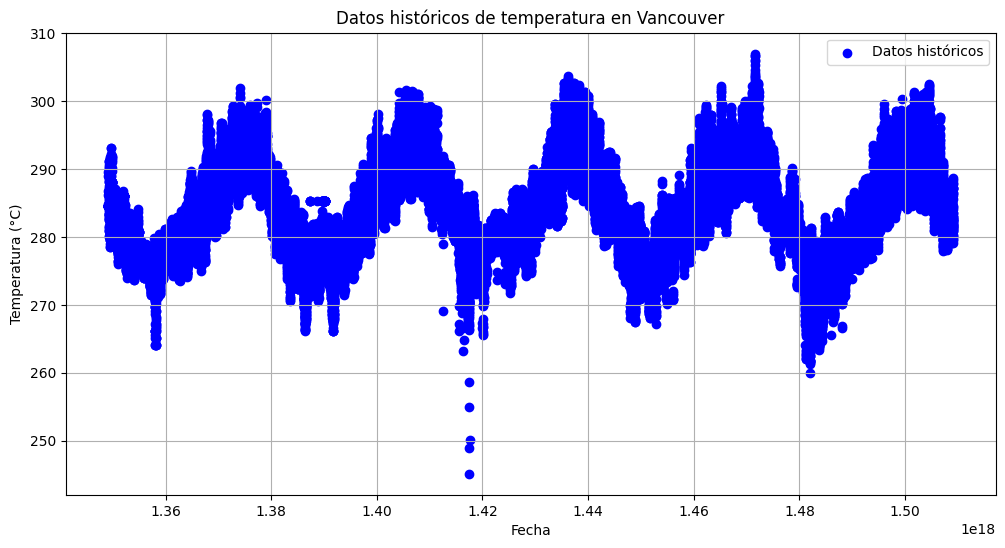

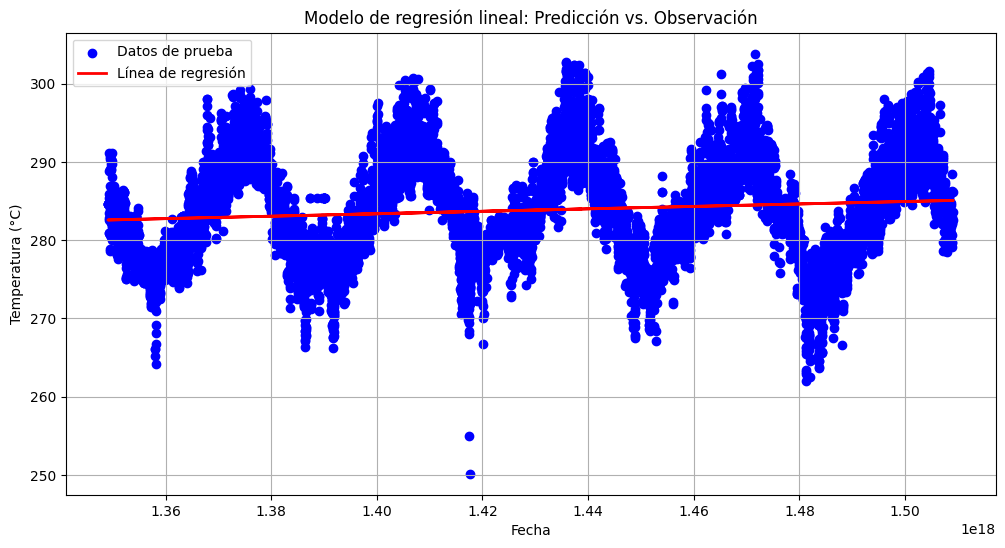

In [ ]:
import matplotlib.pyplot as plt

# Graficar los datos históricos de temperatura de Vancouver
plt.figure(figsize=(12, 6))
plt.scatter(vancouver_data['Fecha'], vancouver_data['Temperatura'], color='blue', label='Datos históricos')
plt.title('Datos históricos de temperatura en Vancouver')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la línea de regresión generada por el modelo
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Modelo de regresión lineal: Predicción vs. Observación')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()
